# Assignment 1 - LeNet
*This notebook was run by Arsyi Syarief Aziz (H071191003) for the Introduction to Deep Learning course (Unhas) taught by Dr. Risman Adnan.*



In this assignment, I will attempt to recreate the LeNet CNN architecture, similar to what Yann LeCun introduced in 1998 to classify numbers found in the MNIST dataset.

The original LeNet (LeNet-5) architecture consists of two parts: 
1. a convolutional encoder consisting of two convolutional layers (which uses a 5x5 kernel and the scaled hyperbolic tangent activation function) and two average pooling layers, and
2. a dense block consisting of three fully-connected layers with the scaled tanh activation function applied to its input and hidden layers, and the euclidiean radial basis function applied to its output layer.

This architecture is visualized in the figure below
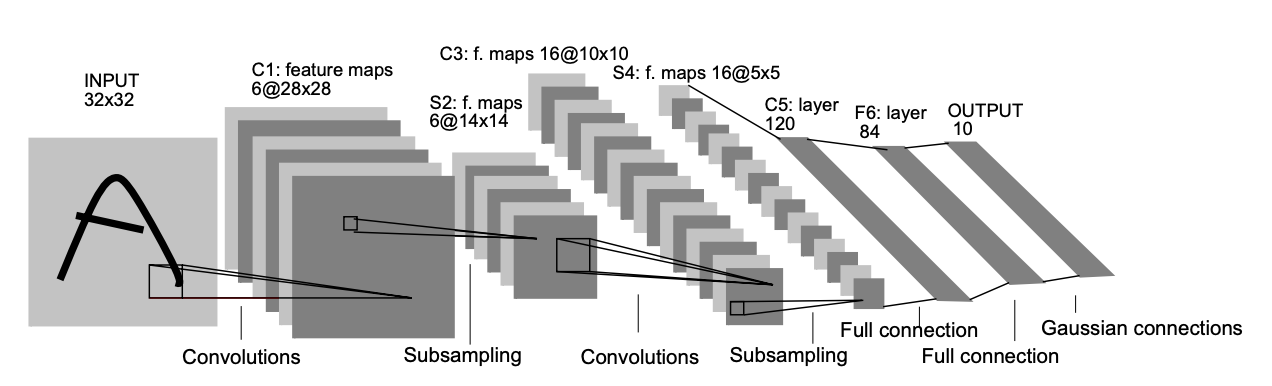

## Implementation

In [1]:
import torch
from torch import nn

In [2]:
class ScaledTanh(nn.Module):
    def __init__(self, amplitude=1.7159, slope=2/3): # Amplitude and slope are defined in LeCun's paper (check Appendix A)
        super().__init__()
        self.amplitude = amplitude
        self.slope = slope

    def forward(self, x):
        return self.amplitude * torch.tanh(self.slope * x)

In [3]:
class RBF(nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()
        self.input_features = input_features
        self.output_features = output_features
        self.weight = nn.Parameter(torch.Tensor(output_features, input_features))
        nn.init.uniform_(self.weight, -1, 1)

    def forward(self, x):
        dif = x[:, None, :] - self.weight # (m, 1, input_features) - (output_features, input_features)
        out = torch.sum(torch.pow(dif, 2), axis=2)
        return out

In [4]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), ScaledTanh(),
    nn.AvgPool2d(kernel_size=2),
    nn.Conv2d(6, 16, kernel_size=5), ScaledTanh(),
    nn.AvgPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), ScaledTanh(),
    nn.Linear(120, 84), ScaledTanh(), 
    RBF(84, 10),
)

In [5]:
import torchvision.datasets as datasets
from torchvision import transforms
import torchvision.transforms as transforms

In [6]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,), (1.0,))])

In [7]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=trans)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=trans)

In [8]:
print(len(mnist_trainset), len(mnist_testset))

60000 10000


In [9]:
batch_size = 256

In [10]:
train_loader = torch.utils.data.DataLoader(
                 dataset=mnist_trainset,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=mnist_testset,
                batch_size=batch_size,
                shuffle=False)

In [11]:
def train(net, train_iter, test_iter, num_epochs, lr):    
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
            
    net.apply(init_weights)
        
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        net.train()
        for i, (X, y) in enumerate(train_iter):
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
        print(f'Epoch: {epoch + 1}')
            

In [12]:
lr, num_epochs = 0.01, 20 
train(net, train_loader, test_loader, num_epochs, lr)

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20


## Testing

In [13]:
import matplotlib.pyplot as plt
from itertools import takewhile

%matplotlib inline

Ex 0:
Prediction: 7
Actual: 7


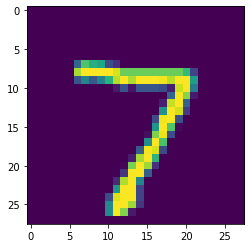

Ex 1:
Prediction: 2
Actual: 2


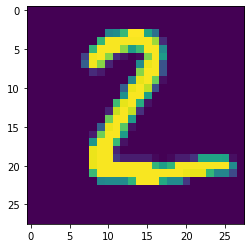

Ex 2:
Prediction: 1
Actual: 1


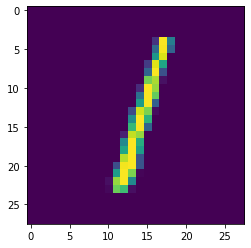

Ex 3:
Prediction: 0
Actual: 0


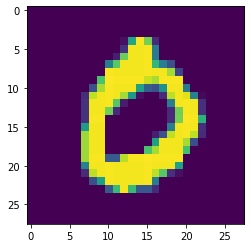

Ex 4:
Prediction: 4
Actual: 4


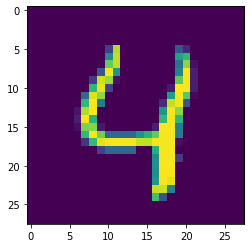

In [14]:
correct = 0
total = 0

number_of_ex_to_show = 5
num_ex_shown = 0
iterables = iter(test_loader)

for data in iterables:
    (X_test, y_test) = data
    for i, (x, y) in enumerate(zip(X_test, y_test)):
      
        y_hat = net(x.reshape(1, 1, 28, 28)).argmax()
        if num_ex_shown < (number_of_ex_to_show):
            print(f'Ex {i}:')
            print(f'Prediction: {y_hat}')
            print(f'Actual: {y}')
            im = x.reshape(28, 28, 1).squeeze()
            plt.imshow(im)
            plt.show()
        if y_hat == y:
            correct += 1
        total +=1
        num_ex_shown += 1


## Results

In [15]:
print(f"Accuracy: {(correct/total)*100}% ({correct}/{total})")

Accuracy: 97.66% (9766/10000)


The model predicted 97.66% (9766/10000) of the test set correctly. 